<a href="https://colab.research.google.com/github/ruforavishnu/attempting_kaggle_2025_santa_competition/blob/main/01_cartesian_geometry_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math


In [2]:
def distance (p1,   p2):
  return math.sqrt( (p2[0] - p2[1])**2    + (p2[1] - p1[1])**2   )



In [3]:
A = (3,4 )
B = (10, 12)



### Create a point and compute distance

In [5]:
print(f'Distance between A and B is :{distance(A,B)}')


Distance between A and B is :8.246211251235321


### Rotate a point around the origin

In [6]:
def rotate_point( point,  angle_degrees ):
  x, y = point
  angle = math.radians(angle_degrees)

  x_new = x * math.cos(angle) - y * math.sin(angle)
  y_new = x * math.sin(angle) + y * math.cos(angle)

  return (x_new,  y_new)



In [7]:
print('Rotate (1,0)   by 90°  = ', rotate_point( (1,0)   ,   90))



Rotate (1,0)   by 90°  =  (6.123233995736766e-17, 1.0)


### Rotate an entire polygon

In [8]:
square = [ (0,0),   (1,0),   (1,1),   (0,1)  ]



In [9]:
def rotate_polygon(  points,  angle_degrees ):
  return [rotate_point(p, angle_degrees)  for p in points]


In [10]:
square = [ (0,0) ,   (1,0),  (1,1)   ,  (0,1)  ]

rotated_square = rotate_polygon(square, 45)



print('Original : ', square)
print('Rotated 45° :', rotated_square)



Original :  [(0, 0), (1, 0), (1, 1), (0, 1)]
Rotated 45° : [(0.0, 0.0), (0.7071067811865476, 0.7071067811865475), (1.1102230246251565e-16, 1.414213562373095), (-0.7071067811865475, 0.7071067811865476)]


### Compute the Axis-Aligned Bounding Box (AABB)

In [11]:
def bounding_box(points):
  xs = [p[0]  for p in points]
  ys = [p[1] for p in points]

  min_x = min(xs)
  min_y = min(ys)
  max_x = max(xs)
  max_y = max(ys)


  return (min_x, min_y,      max_x, max_y)





In [12]:
bbox = bounding_box(rotated_square)
print('Bounding box: ', bbox)



Bounding box:  (-0.7071067811865475, 0.0, 0.7071067811865476, 1.414213562373095)


### Plot original polygon, rotated polygon, and AABB

In [17]:
import matplotlib.pyplot as plt

def plot_polygon_and_bbox(original,   rotated,   bbox ):

  ox, oy = zip(  *(original  + [original[0]    ]))
  rx, ry = zip(   *(rotated  + [rotated[0] ]  ))

  min_x,  min_y,  max_x, max_y = bbox


  plt.figure(figsize=(6,6))
  plt.plot(ox,  oy,  'b-',  label='Original Polygon')


  plt.plot(rx, ry, 'r-', label='Rotated Polygon')

  box_x = [min_x, max_x , max_x, min_x, min_x]
  box_y = [min_y, min_y, max_y, max_y,  min_y]

  plt.plot(box_x,  box_y,  'g--', label='AABB bounding box')

  plt.gca().set_aspect('equal',  adjustable='box')


  plt.grid(True)
  plt.legend()
  plt.title('Polygon Rotation + Bounding Box')
  plt.show()



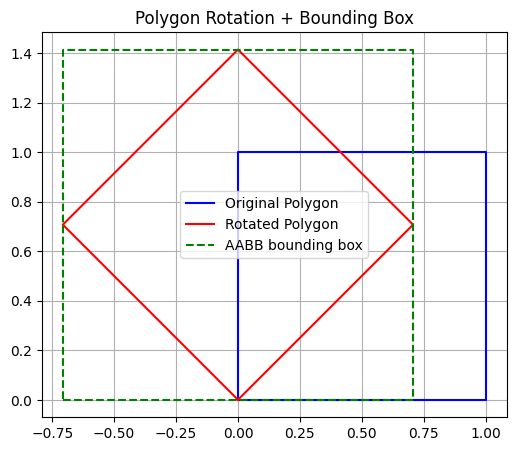

In [18]:
square = [ (0,0),   (1,0),  (1,1),   (0,1)   ]

rotated_square = rotate_polygon(square, 45)

bbox_square = bounding_box(rotated_square)


plot_polygon_and_bbox(square, rotated_square, bbox_square)


### Exercises

#### Exercise 1

In [20]:
point = (5,  -2)

rotated_pt1 = rotate_point(point, 30)
rotated_pt2 = rotate_point(point, 45)
rotated_pt3 = rotate_point(point, 90)


print(f'Rotated point {point} by 30° = {rotated_pt1}')
print(f'Rotated point {point} by 45° = {rotated_pt2}')
print(f'Rotated point {point} by 90° = {rotated_pt3}')




Rotated point (5, -2) by 30° = (5.330127018922194, 0.7679491924311221)
Rotated point (5, -2) by 45° = (4.949747468305833, 2.121320343559642)
Rotated point (5, -2) by 90° = (2.0000000000000004, 5.0)


### Exercise 2 — Plot the triangle after rotation

In [24]:
T = [(0,0), (2,0), (1,3)]

T


[(0, 0), (2, 0), (1, 3)]

In [30]:
x_vals = []
y_vals = []


for pt in T:
  x_vals.append( pt[0] )
  y_vals.append( pt[1] )


print(f'x_vals is : {x_vals}')
print(f'y_vals is : {y_vals}')



rotated_triangle1 =  [rotate_point(pt,45)  for pt in T ]


print(rotated_triangle1)

x_vals is : [0, 2, 1]
y_vals is : [0, 0, 3]
[(0.0, 0.0), (1.4142135623730951, 1.414213562373095), (-1.414213562373095, 2.8284271247461903)]


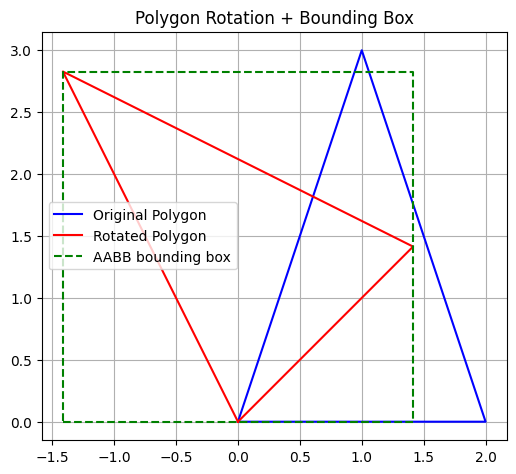

In [31]:
bbox1 = bounding_box(rotated_triangle1)
plot_polygon_and_bbox(T, rotated_triangle1, bbox1)


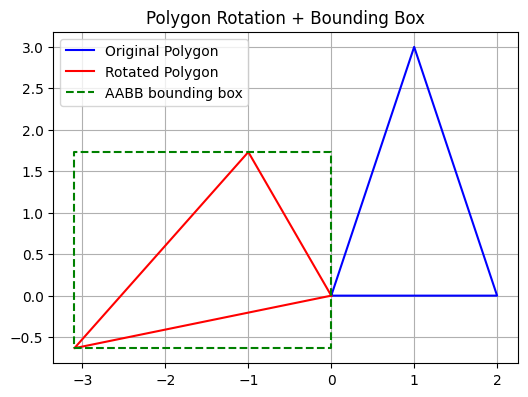

In [33]:
rotated_triangle2 = [rotate_point(pt, 120) for pt in T]

bbox2 = bounding_box(rotated_triangle2)
plot_polygon_and_bbox(T, rotated_triangle2, bbox2)





##### Exercise 3


In [34]:
C = [(0,0), (3,1), (4,3), (2,5), (0,4)]


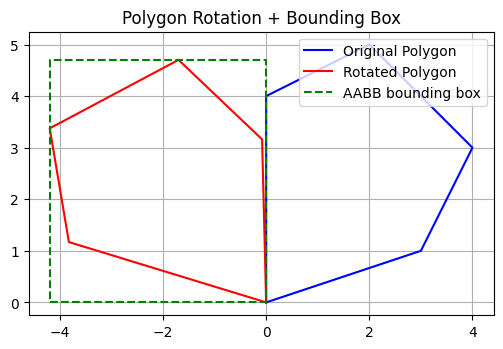

In [36]:
rotated_triangle3 = [rotate_point(pt, 73) for pt in C]

bbox3 = bounding_box(rotated_triangle3)
plot_polygon_and_bbox(C, rotated_triangle3, bbox3)